In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("titanic.csv")

# Calculate mean and standard deviation for Age
mean_age = df["Age"].mean()
std_age = df["Age"].std()
print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation of Age: {std_age:.2f}")


Mean Age: 29.70
Standard Deviation of Age: 14.53


the following method is the most accurate way to fill the ages


First 10 rows of Age and Age filled by Pclass:
    Age  age_filled_class
0  22.0          22.00000
1  38.0          38.00000
2  26.0          26.00000
3  35.0          35.00000
4  35.0          35.00000
5   NaN          25.14062
6  54.0          54.00000
7   2.0           2.00000
8  27.0          27.00000
9  14.0          14.00000


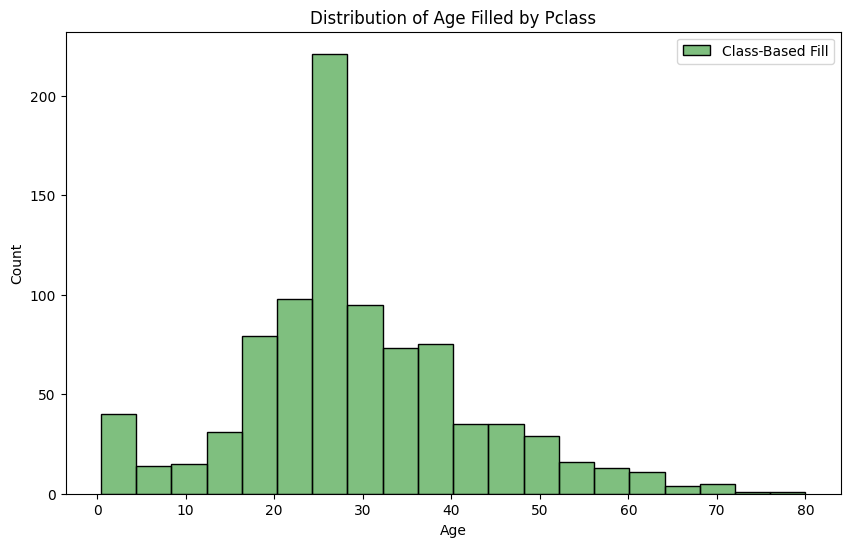

In [ ]:
# Fill missing Age values based on Pclass group means
df["age_filled_class"] = df.groupby("Pclass")["Age"].transform(
    lambda group: group.fillna(group.mean())
)

# Display first 10 rows for comparison
print("\nFirst 10 rows of Age and Age filled by Pclass:")
print(df[["Age", "age_filled_class"]].head(10))

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df["age_filled_class"],
    bins=20,
    color="green",
    label="Class-Based Fill",
    alpha=0.5,
)
plt.title("Distribution of Age Filled by Pclass")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

--------------------------------------------------------------------------------

2nd most accurate


First 10 rows of Age and Age filled by Mean:
    Age  age_filled_mean
0  22.0        22.000000
1  38.0        38.000000
2  26.0        26.000000
3  35.0        35.000000
4  35.0        35.000000
5   NaN        29.699118
6  54.0        54.000000
7   2.0         2.000000
8  27.0        27.000000
9  14.0        14.000000


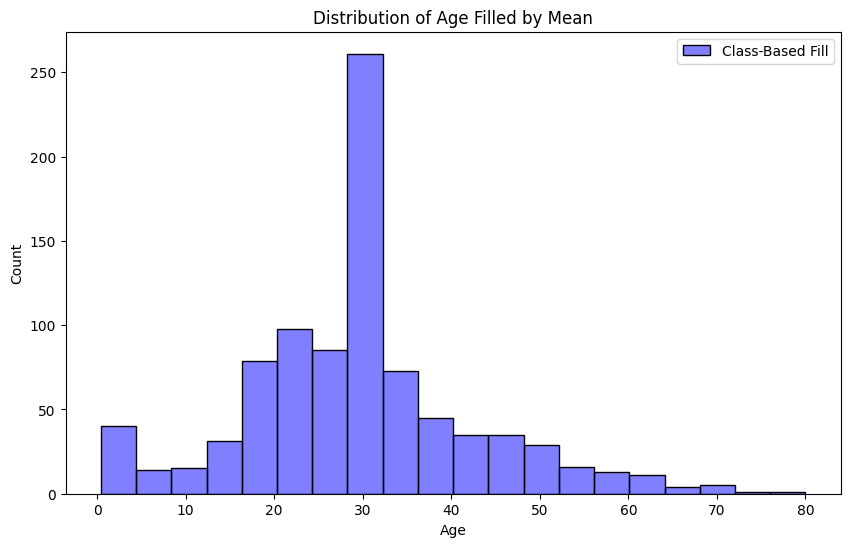

In [ ]:
# fill misssing age values with overall mean
df["age_filled_mean"] = df["Age"].fillna(mean_age)


# Display first 10 rows for comparison
print("\nFirst 10 rows of Age and Age filled by Mean:")
print(df[["Age", "age_filled_mean"]].head(10))

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df["age_filled_mean"],
    bins=20,
    color="blue",
    label="Class-Based Fill",
    alpha=0.5,
)
plt.title("Distribution of Age Filled by Mean")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

----------------------------------------------------


3rd most accurate 


First 10 rows of Age and Age filled by Pclass:
    Age  age_filled_sex
0  22.0       22.000000
1  38.0       38.000000
2  26.0       26.000000
3  35.0       35.000000
4  35.0       35.000000
5   NaN       30.726645
6  54.0       54.000000
7   2.0        2.000000
8  27.0       27.000000
9  14.0       14.000000


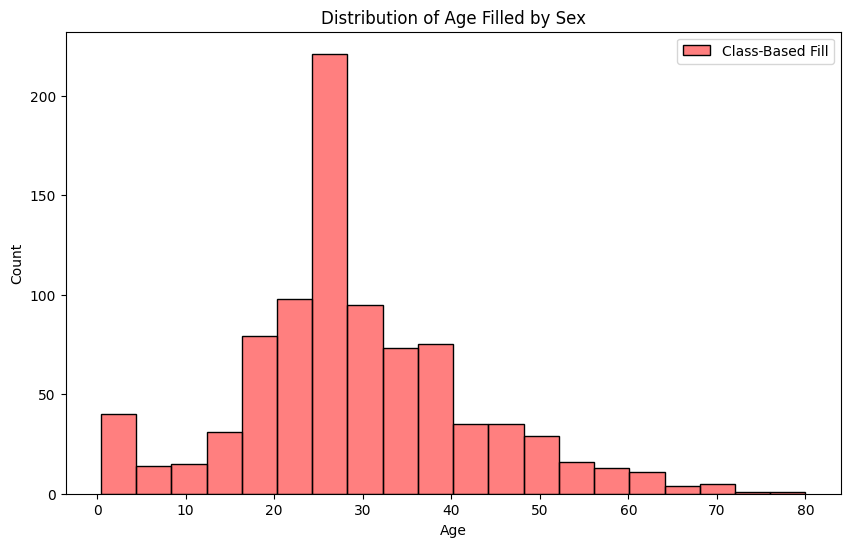

In [ ]:
# Fill missing Age values based on Pclass group means
df["age_filled_sex"] = df.groupby("Sex")["Age"].transform(
    lambda group: group.fillna(group.mean())
)

# Display first 10 rows for comparison
print("\nFirst 10 rows of Age and Age filled by Pclass:")
print(df[["Age", "age_filled_sex"]].head(10))

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df["age_filled_class"],
    bins=20,
    color="red",
    label="Class-Based Fill",
    alpha=0.5,
)
plt.title("Distribution of Age Filled by Sex")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

calculating survival probabilty

Overall Survival Probability: 0.38

Survival Probability by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


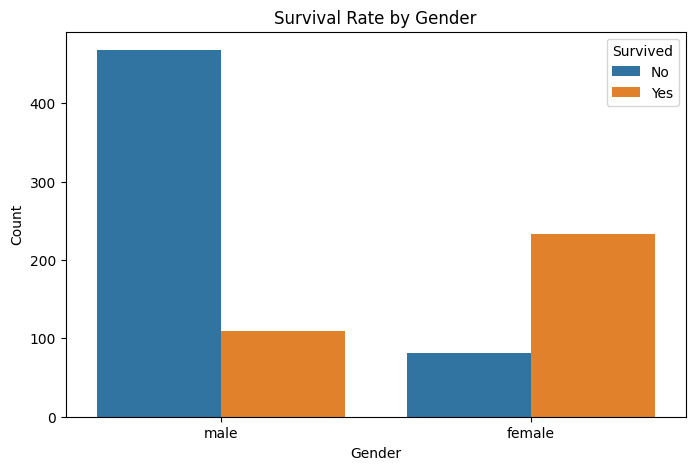

In [ ]:
# Calculate overall survival probability
total_passengers = len(df)
survived_count = df["Survived"].sum()
survival_prob = survived_count / total_passengers
print(f"Overall Survival Probability: {survival_prob:.2f}")

# Calculate survival probability by Sex
survival_by_sex = df.groupby("Sex")["Survived"].mean()
print("\nSurvival Probability by Sex:")
print(survival_by_sex)

# Visualize survival distribution by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

children survival probabilty

Survival Probability for Children Under 10: 0.61


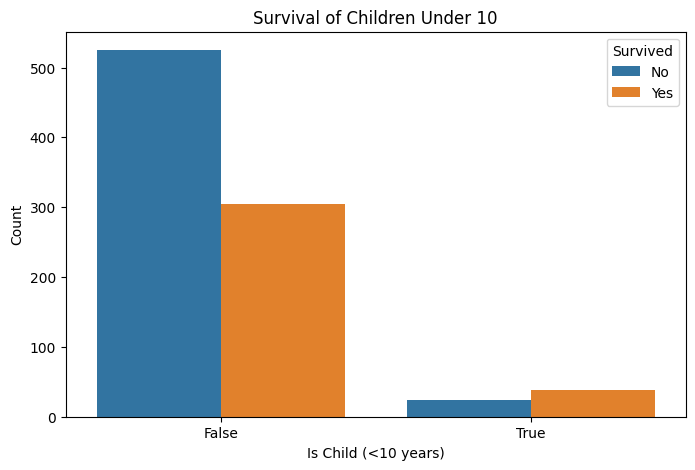

In [ ]:
# Calculate children survival probability
df["is_child"] = df["Age"] < 10
child_survival_prob = df[df["is_child"]]["Survived"].mean()

# Calculate survival probability 
print(f"Survival Probability for Children Under 10: {child_survival_prob:.2f}")

# Visualize survival distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="is_child", hue="Survived", data=df)
plt.title("Survival of Children Under 10")
plt.xlabel("Is Child (<10 years)")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

Survival Scores for First 5 Passengers: [-1.8375   -0.235835 -2.20375  -0.845    -3.0975  ]

Survival Scores with New Weights: [-0.375    5.22833 -0.5075   3.56    -0.945  ]


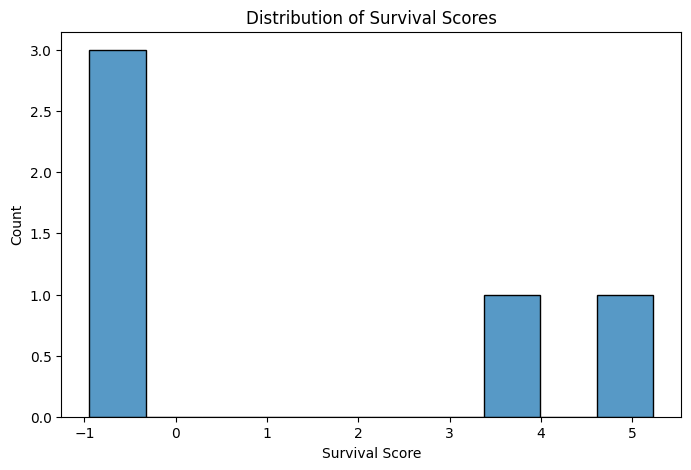

In [ ]:
# Define weights for Age and Fare features
weights = np.array([-0.1, 0.05])

# Extract features (Age and Fare) for the first 5 passengers, removing rows with NaN
features = df[["Age", "Fare"]].dropna().head(5).to_numpy()

# Calculate survival scores using matrix multiplication
survival_scores = features @ weights
print(f"Survival Scores for First 5 Passengers: {survival_scores}")

# Define new weights and recalculate scores
new_weights = np.array([-0.05, 0.1])
new_survival_scores = features @ new_weights
print("\nSurvival Scores with New Weights:", new_survival_scores)

# Add new scores to the DataFrame in a new column
df["survival_score"] = np.nan
df.loc[df.index[:len(new_survival_scores)], "survival_score"] = new_survival_scores

# Visualize the distribution of survival scores
plt.figure(figsize=(8, 5))
sns.histplot(data=df["survival_score"].dropna(), bins=10)
plt.title("Distribution of Survival Scores")
plt.xlabel("Survival Score")
plt.ylabel("Count")
plt.show()